In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
Iris=ds.load_iris()
xdata=Iris.data.astype(np.float32)
tdata=Iris.target.astype(np.int32)
tdata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
D,N = xdata.shape
D

150

In [18]:
Dtrain=D//2
index=np.random.permutation(range(D))
xtrain=xdata[index[0:Dtrain],:]
ttrain=tdata[index[0:Dtrain]]
xtest=xdata[index[Dtrain:D],:]
ttest=tdata[index[Dtrain:D]]

In [19]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [47]:
C=np.max(tdata)+1
NN=Chain(l1=L.Linear(N,3),l2=L.Linear(3,3),l3=L.Linear(3,C))

In [48]:
def model(x):
    h=NN.l1(x)
    h=F.sigmoid(h)
    h=NN.l2(h)
    h=F.sigmoid(h)
    y=NN.l3(h)
    return y

In [49]:
optNN=Opt.SGD()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

In [50]:
T=1000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ytrain=model(xtrain)
    loss_train=F.softmax_cross_entropy(ytrain,ttrain)
    acc_train=F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    config.train=False
    ytest=model(xtest)
    loss_test=F.softmax_cross_entropy(ytest,ttest)
    acc_test=F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

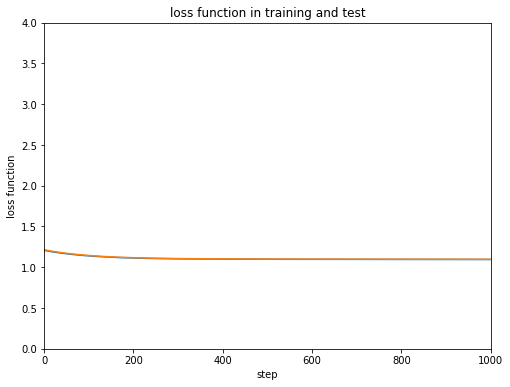

In [51]:
Tall=len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

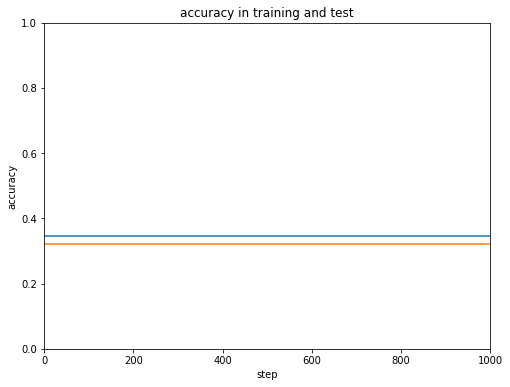

In [52]:
Tall=len(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1.0])
plt.show()

### relu関数の利用

In [53]:
def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.l2(h)
    h=F.relu(h)
    y=NN.l3(h)
    return y

In [67]:
NN=Chain(l1=L.Linear(N,3),l2=L.Linear(3,3),l3=L.Linear(3,C))
optNN=Opt.SGD()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
T=1000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ytrain=model(xtrain)
    loss_train=F.softmax_cross_entropy(ytrain,ttrain)
    acc_train=F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    config.train=False
    ytest=model(xtest)
    loss_test=F.softmax_cross_entropy(ytest,ttest)
    acc_test=F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

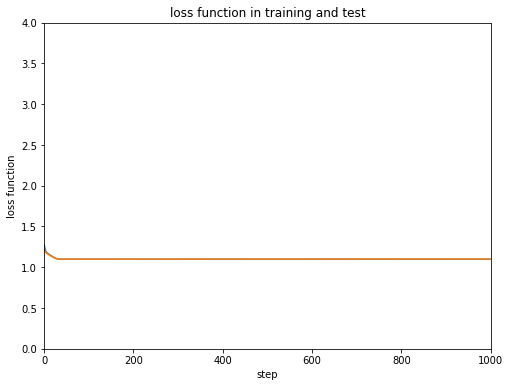

In [68]:
Tall=len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

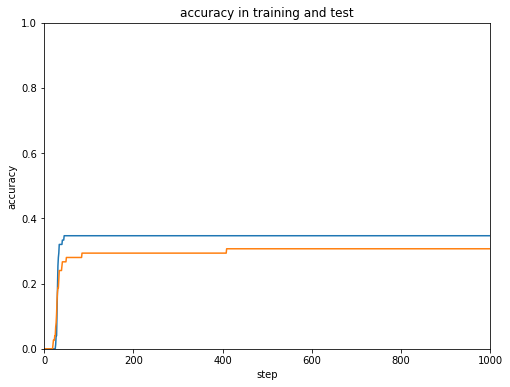

In [69]:
Tall=len(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1.0])
plt.show()

In [58]:
dir(Opt)

['AdaDelta',
 'AdaGrad',
 'Adam',
 'CorrectedMomentumSGD',
 'MSVAG',
 'MomentumSGD',
 'NesterovAG',
 'RMSprop',
 'RMSpropGraves',
 'SGD',
 'SMORMS3',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ada_delta',
 'ada_grad',
 'adam',
 'corrected_momentum_sgd',
 'momentum_sgd',
 'msvag',
 'nesterov_ag',
 'rmsprop',
 'rmsprop_graves',
 'sgd',
 'smorms3']

### モーメント勾配法の利用

In [76]:
NN=Chain(l1=L.Linear(N,3),l2=L.Linear(3,3),l3=L.Linear(3,C))
optNN=Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

In [77]:
T=1000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ytrain=model(xtrain)
    loss_train=F.softmax_cross_entropy(ytrain,ttrain)
    acc_train=F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    config.train=False
    ytest=model(xtest)
    loss_test=F.softmax_cross_entropy(ytest,ttest)
    acc_test=F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

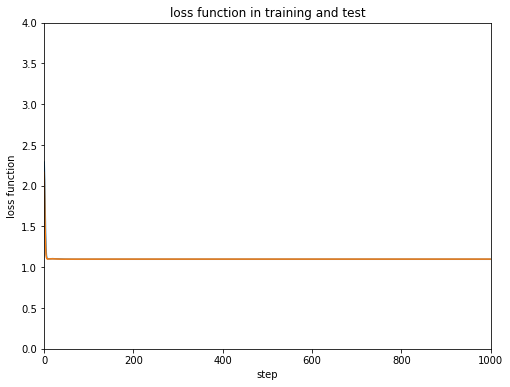

In [78]:
Tall=len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

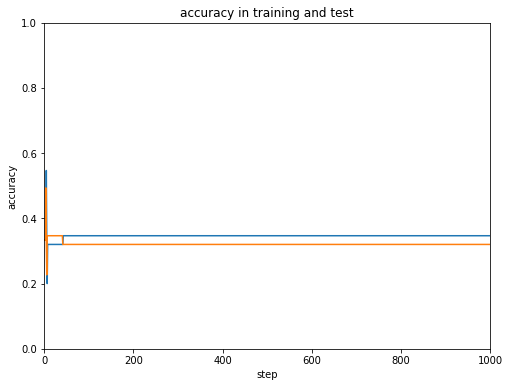

In [79]:
Tall=len(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0.0,1.0])
plt.show()

### 適応的モーメント勾配法の利用

In [90]:
NN=Chain(l1=L.Linear(N,3),l2=L.Linear(3,3),l3=L.Linear(3,C))
optNN=Opt.Adam()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

In [91]:
T=1000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ytrain=model(xtrain)
    loss_train=F.softmax_cross_entropy(ytrain,ttrain)
    acc_train=F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    config.train=False
    ytest=model(xtest)
    loss_test=F.softmax_cross_entropy(ytest,ttest)
    acc_test=F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

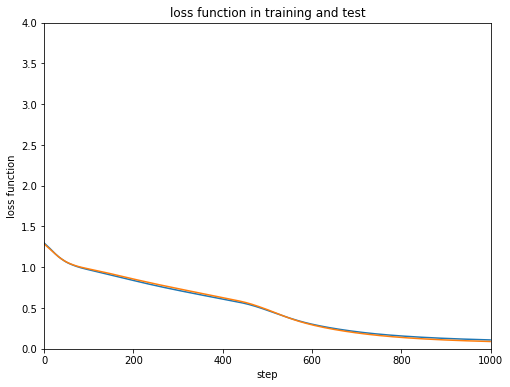

In [92]:
Tall=len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

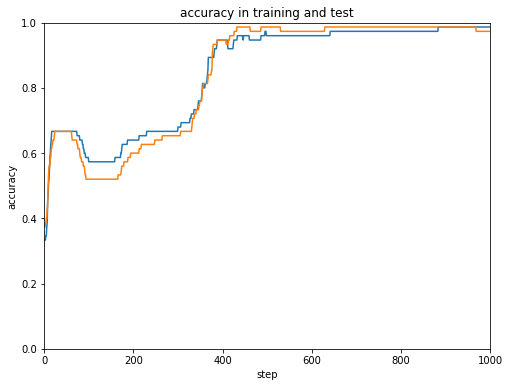

In [93]:
Tall=len(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0.0,1.0])
plt.show()